In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement_tb = Base.classes.measurement
station_tb = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# max function used to find the most recent date 
# .first() used to display only the first result from the table's date column 

recent_date = session.query(func.max(measurement_tb.date)).first()

recent_date

# ('2017-08-23',)

('2017-08-23',)

2016-08-23


Text(0, 0.5, 'Inches of Precipitation')

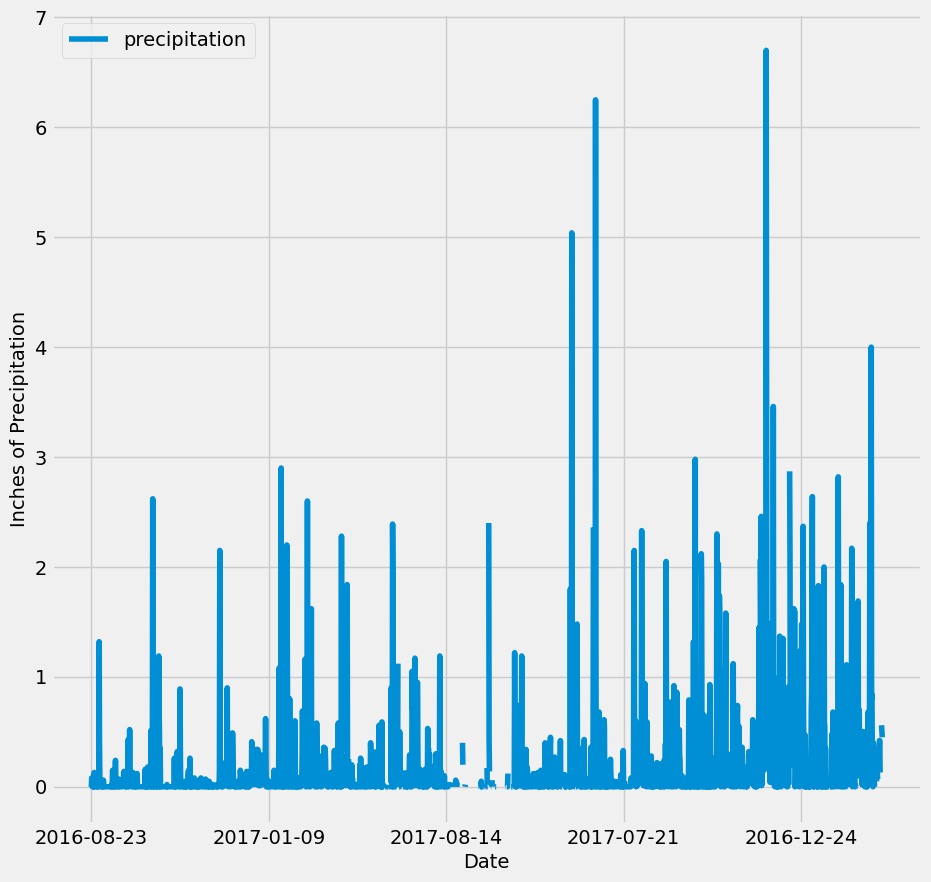

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

most_recent_date = session.query(measurement_tb.date).order_by(measurement_tb.date.desc()).first()
most_recent_date


# Calculate the date one year from the last date in data set.

one_year_before = dt.date(2017, 8 ,23) - dt.timedelta(days=365)
print(one_year_before)


# Perform a query to retrieve the data and precipitation scores
precip_score = []
precip_score = session.query(measurement_tb.date, measurement_tb.prcp).filter(measurement_tb.date >= one_year_before).all()



# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_score_df = pd.DataFrame(precip_score, columns= ['date' , 'precipitation'])



# Sort the dataframe by date

precip_score_df.set_index(precip_score_df['date'], inplace=True)
precip_score_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precip_score_df.plot(figsize= (10,10))
plt.xlabel("Date")
plt.ylabel("Inches of Precipitation")


In [81]:
# Use Pandas to calculate the summary statistics for the precipitation data

precip_score_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [86]:
# Design a query to calculate the total number of stations in the dataset

session.query(func.count(station_tb.station)).all()

[(9,)]

In [91]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(measurement_tb.station, func.count(measurement_tb.station)).\
group_by(measurement_tb.station).order_by(func.count(measurement_tb.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [92]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# use tobs

session.query(func.min(measurement_tb.tobs), func.max(measurement_tb.tobs), func.avg(measurement_tb.tobs)).\
filter(measurement_tb.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

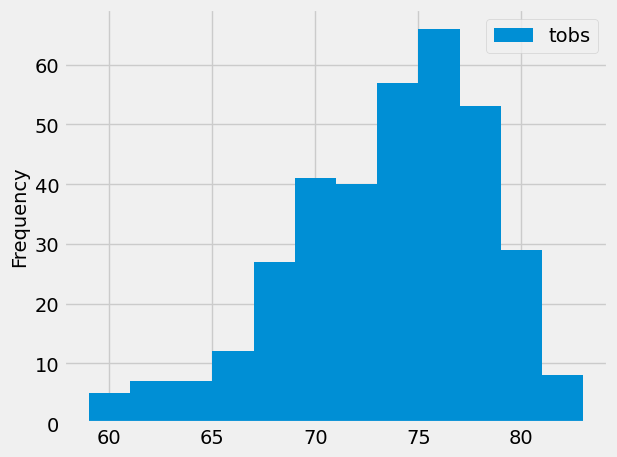

In [107]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs = session.query(measurement_tb.tobs).\
filter(measurement_tb.station== 'USC00519281').\
filter(measurement_tb.date >= one_year_before).all()


temp_obs_df = pd.DataFrame(temp_obs, columns= ['tobs'])
temp_obs_df.plot.hist(bins=12)
plt.tight_layout()


# Close Session

In [108]:
# Close Session
session.close()